In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

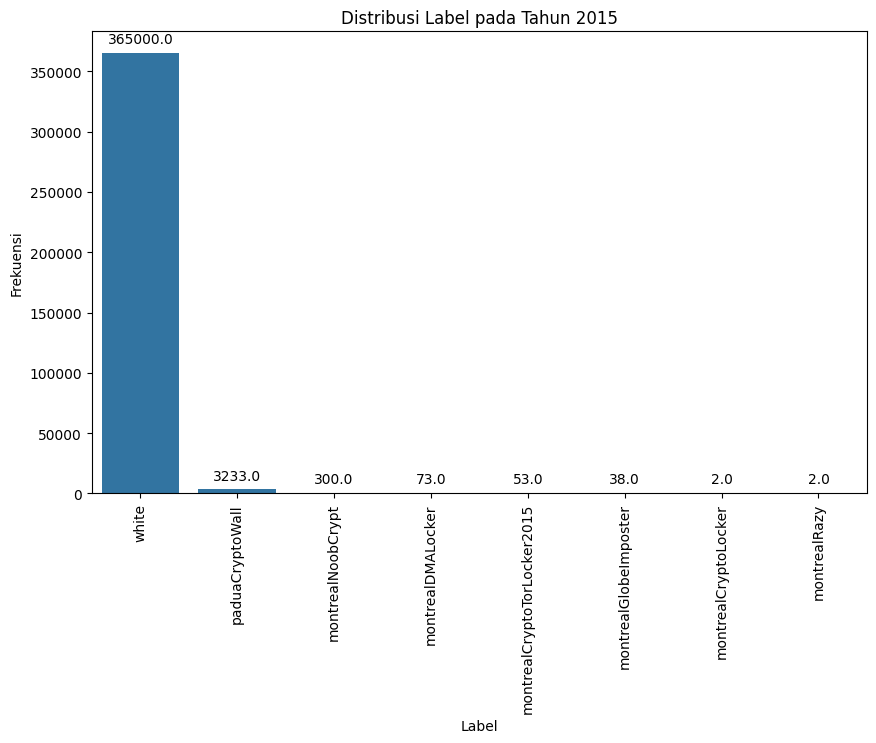

In [2]:
# Asumsikan df adalah DataFrame Anda
df = pd.read_csv('BitcoinHeistData.csv')

# Filter data untuk tahun 2015
df_2015 = df[df['year'] == 2015]

# Buat histogram untuk kolom 'Label'
plt.figure(figsize=(10,6))
sns.countplot(data=df_2015, x='label', order = df_2015['label'].value_counts().index)

plt.title('Distribusi Label pada Tahun 2015')
plt.xlabel('Label')
plt.ylabel('Frekuensi')

# Menambahkan angka di atas setiap batang
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 10), 
                       textcoords = 'offset points')

plt.xticks(rotation=90)
plt.show()

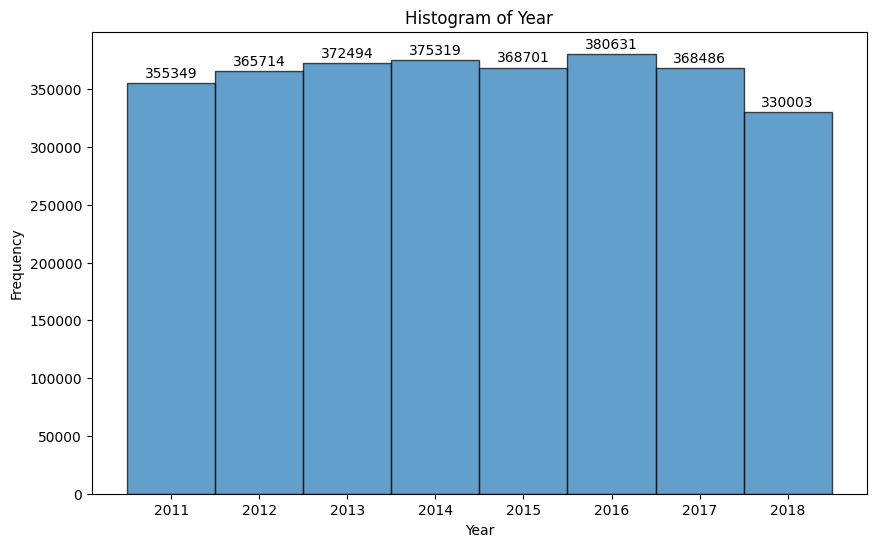

In [3]:
# Get unique years sorted in ascending order and add 1 to the max year
unique_years = sorted(df['year'].unique())
unique_years.append(unique_years[-1] + 1)

# Create a histogram for the 'year' column
plt.figure(figsize=(10,6))
counts, bins, patches = plt.hist(df['year'], bins=unique_years, alpha=0.7, edgecolor='black', align='left')

# Add frequency count on top of each bar
for count, bin, patch in zip(counts, bins, patches):
    plt.annotate(f'{int(count)}', (bin, count), xytext=(0, 2), textcoords='offset points', ha='center', va='bottom')

plt.title('Histogram of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(unique_years[:-1])  # Set x-ticks to be the unique years
plt.show()

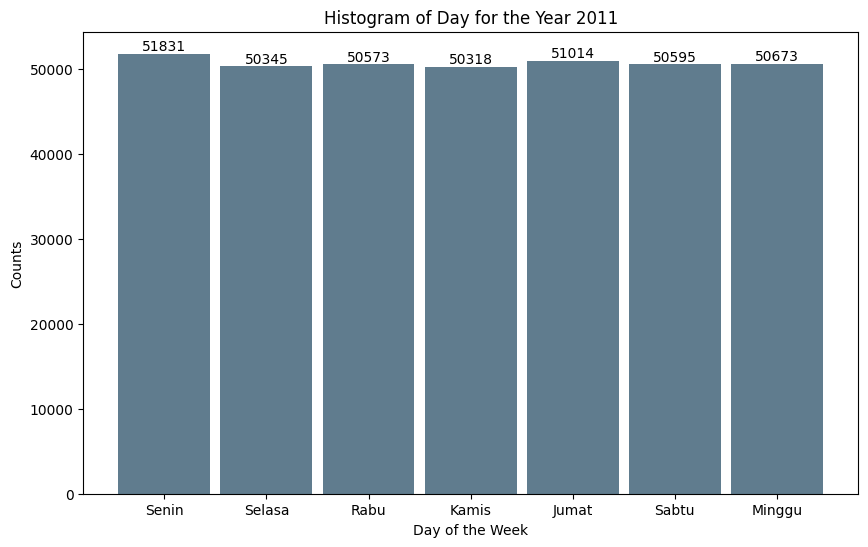

In [5]:
# Filter data for the year 2011
df_2011 = df[df['year'] == 2011].copy()

# Convert the 'day' column to datetime format
df_2011.loc[:, 'date'] = pd.to_datetime(df_2011['day'], format='%j')

# Create a new column for the day of the week
df_2011.loc[:, 'day_of_week'] = df_2011['date'].dt.day_name(locale='id_ID.utf8')

# Order of the days of the week
order = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']

# Plot histogram
plt.figure(figsize=(10,6))
counts, bins, bars = plt.hist(df_2011['day_of_week'], bins=np.arange(8)-0.5, rwidth=0.9, color='#607c8e', align='mid')

# Set the xticks to be the days of the week
plt.xticks(range(len(order)), order)

# Add counts above the two bar graphs
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + .005, int(yval), ha='center', va='bottom')  # Change here

plt.title('Histogram of Day for the Year 2011')
plt.xlabel('Day of the Week')
plt.ylabel('Counts')
plt.show()


In [6]:
# Tampilkan sampel pada baris 04459
print(df.iloc[4459])

address      14EZSJRGdxaioeDETxskw4FN69NeDjqQNT
year                                       2013
day                                         292
length                                        0
weight                                     0.25
count                                         1
looped                                        0
neighbors                                     2
income                               57103000.0
label                      montrealCryptoLocker
Name: 4459, dtype: object
